# **Credit Limit** Prediction Using Deep Neural Networks

## Authors
- **Kianoosh Vadaei**: Researcher
- **Melika Shirian**: Researcher

### Contact Information
- Kianoosh Vadaei: [email](mailto:kia.vadaei@gmail.com), [LinkedIn](https://www.linkedin.com/in/kianoosh-vadaei-0aa58611b/), [GitHub](https://github.com/kia-vadaei)
- Melika Shirian: [email](mel.shirian@gmail.com), [LinkedIn](https://www.linkedin.com/in/melika-shirian-b8477a254/), [GitHub](https://github.com/MelikaShirian12)


## Introduction
This notebook provides an analysis of **Credit Limit** Prediction. We will cover the following steps:
1. Data Loading
2. Data Preprocessing
3. Exploratory Data Analysis
4. Model Building
5. Model Evaluation
6. Conclusion

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Expanding Dataset](#Expanding-Dataset)
4. [Polynomial Features](#Polynomial-Features)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
7. [Model Building](#Model-Building)
8. [Model Evaluation](#Model-Evaluation)
9. [Conclusion](#Conclusion)



In [ ]:
import torch
from tqdm import *
from dataset import Dataset
from models import OneLayerModel, TwoLayerModel, ClassicModels, ExtraTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from globals import Global


Here we get an instance of the singleton `Global` class and set the private device type to `device` based on the system.

It's for PyTorch device management!

In [42]:
globals = Global()
globals.set_device_mode("cuda" if torch.cuda.is_available() else "cpu")
globals.get_device()

device(type='cuda')

<a id='Data-Loading'></a>
## **Data Loading**
In this section, we will load the dataset and display the first few rows to understand its structure.


In [43]:
dataset = Dataset(data_path='../data/CreditPrediction.csv', target_col='Credit_Limit')
dataset.load_data()

print(f'The dataset is shown below:')
display(dataset.data_df)

The dataset is shown below:


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10162,718673358,35.0,M,3,Doctorate,NaN,$80K - $120K,Blue,30.0,5.0,3,4,13590.0,1528,0.728,2137,52,0.486,0.112,NaN
10163,715207458,46.0,F,1,Unknown,Single,Less than $40K,Blue,39.0,2.0,2,1,2029.0,1074,0.514,4802,90,0.800,0.529,NaN
10164,803665983,52.0,M,0,Unknown,NaN,$60K - $80K,Blue,46.0,3.0,2,4,2742.0,2184,0.592,3829,72,0.532,0.796,NaN
10165,713183508,39.0,F,1,High School,NaN,Unknown,NaN,36.0,1.0,3,2,2751.0,1158,0.821,4861,82,0.822,0.421,NaN


## Expanding Dataset
To avoid seeing the results with the expanded dataset, **do not run the cell below**.


In [ ]:
dataset.dataset_mode = 'expanded'
dataset.expand_dataset(n_samples=100, noise_level=.7)
dataset.save_expanded_dataset()

## Polynomial Features
To avoid seeing the results with the polynomial features, **do not run the cell below**.


In [ ]:
dataset.dataset_mode = 'polynomial_features'
dataset.make_polynomial_features()
dataset.save_polynomyal_features()

## **Data Preprocessing**
Here, we will preprocess the data, including handling missing values, encoding categorical variables, and scaling numerical features.

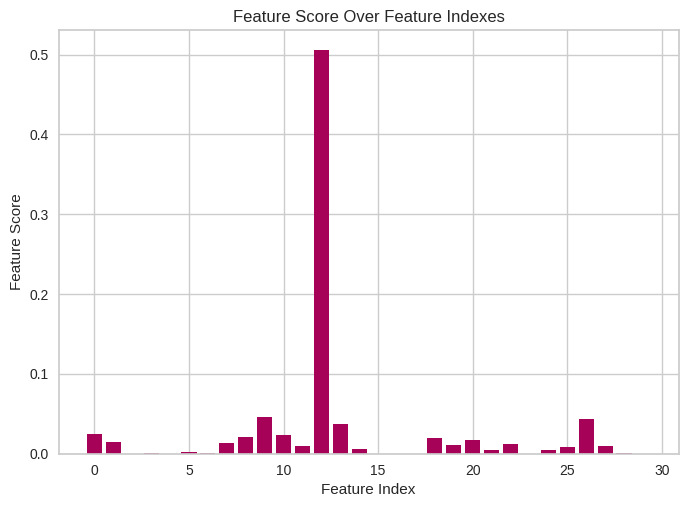

In [46]:
dataset.preprocess_data(features_score_plot=True, random_state=112, pca=False, feature_selection=True, dataset_mode=dataset.dataset_mode)

Here we can see the number of selected data after preprocessing.

In [47]:
print(f'number of selected features: {len(dataset.selected_feature_indices)}')

number of selected features: 20


## **Model Building**
We will build and train some models such as deep neural network model or classic regression models to predict credit limits.


In [48]:
dataset.prepare_for_model()
dataset.to_device(globals.get_device())

In [49]:
nn_model_1_layer = OneLayerModel(dataset.num_features , hidden_size=16, device=globals.get_device())
nn_model = nn_model_1_layer.to(globals.get_device())

nn_model_2_layer = TwoLayerModel(dataset.num_features , hidden_size=16, device=globals.get_device())
nn_model = nn_model_2_layer.to(globals.get_device())

classic_models = ClassicModels()

extra_tree_rg = ExtraTreeRegressor()

Two layers neural network model fit:

100%|██████████| 30000/30000 [01:26<00:00, 345.27it/s]


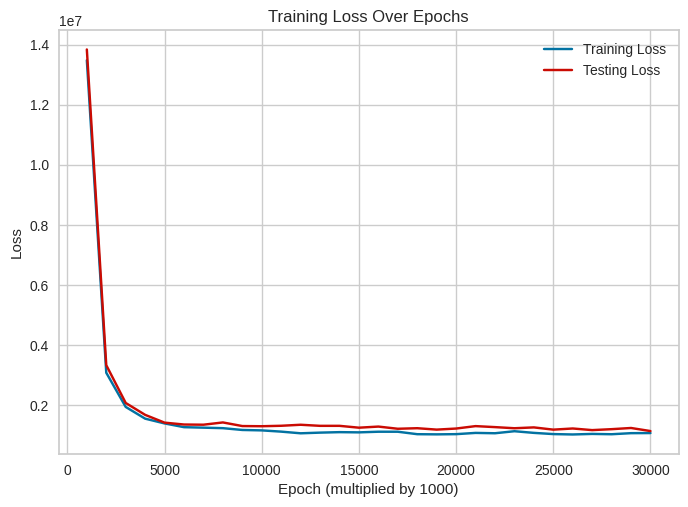

In [50]:
nn_model_2_layer.fit(dataset.X_train, dataset.target_train, dataset.X_test, dataset.target_test, show_plot=True)

One layers neural network model fit:

100%|██████████| 30000/30000 [02:14<00:00, 223.56it/s]


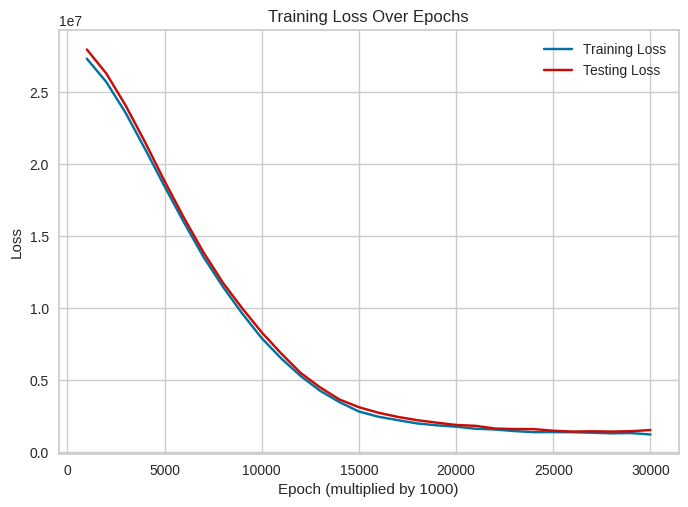

In [52]:
nn_model_1_layer.fit(dataset.X_train, dataset.target_train, dataset.X_test, dataset.target_test, show_plot=True)

Extra Tree regressor model fit:

In [54]:
extra_tree_rg.fit(dataset.X_train, dataset.target_train)

## Model Evaluation
We will evaluate the performance of our model using various metrics.

Test report of two layer neural network model:

In [58]:
nn_model_2_layer.test_report(dataset.X_test, dataset.target_test)

,Model,MSE,MAE,RMSE,R2,TT (Sec)
0,TwoLayerModel,1204846.75,750.60968,1097.655114,0.377748,87.056565


Test report of one layer neural network model:

In [68]:
nn_model_1_layer.test_report(dataset.X_test, dataset.target_test)

,Model,MSE,MAE,RMSE,R2,TT (Sec)
0,OneLayerModel,1452649.5,896.111511,1205.259101,0.264342,134.511441


Test report of Extra Tree model:

In [71]:
x_test_et = dataset.X_test.to(torch.device('cpu'))
y_test_et = dataset.target_test.to(torch.device('cpu'))

report = extra_tree_rg.test_report(x_test_et,y_test_et)
report['Model'] = 'Extra Tree Regressor'
report

,Model,MSE,MAE,RMSE,R2,TT (Sec)
0,Extra Tree Regressor,628240.412994,350.08848,792.616183,0.759685,None


Test report of classical models:

In [69]:
X = torch.vstack((dataset.X_train, dataset.X_test))
y = torch.vstack((dataset.target_train, dataset.target_test))

classic_models.classical_report(X, y)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(5062, 21)"
4,Transformed data shape,"(5062, 21)"
5,Transformed train set shape,"(3543, 21)"
6,Transformed test set shape,"(1519, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,445.4588,621547.1446,787.5815,0.7977,0.1561,0.0932,0.3300
rf,Random Forest Regressor,363.3139,622518.8719,787.4923,0.7973,0.1558,0.0772,0.6520
et,Extra Trees Regressor,347.5272,629266.0981,792.2530,0.7947,0.1566,0.0739,0.3600
lightgbm,Light Gradient Boosting Machine,390.2857,659976.6464,811.3919,0.7852,0.1603,0.0827,4.2540
lasso,Lasso Regression,755.9981,943498.1812,970.8291,0.6931,0.2071,0.1668,0.4080
llar,Lasso Least Angle Regression,755.9991,943497.9125,970.8289,0.6931,0.2071,0.1668,0.0190
lr,Linear Regression,756.2240,943926.6125,971.0519,0.6929,0.2073,0.1669,0.6400
ridge,Ridge Regression,756.0962,943930.4500,971.0533,0.6929,0.2072,0.1669,0.0270
br,Bayesian Ridge,756.0084,943941.7750,971.0588,0.6929,0.2071,0.1668,0.0230
lar,Least Angle Regression,757.0894,946019.8438,972.1326,0.6923,0.2077,0.1672,0.0200


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,440.0168,599164.3892,774.0571,0.8111,0.1511,0.0900


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,target,prediction_label
3083,-0.605583,-1.862065,1.581942,-1.610190,0.303717,-0.609048,-1.016958,-1.839365,-1.271757,-0.832950,...,-0.226157,-1.178860,1.501439,-0.392166,-0.353143,-0.788979,-0.370346,0.0,4152.0,5103.137594
3553,1.367997,-0.705042,-0.476525,-0.006140,0.092760,-0.055413,0.438376,-0.534551,0.774026,1.200552,...,4.421710,0.848277,-0.666028,2.549944,-0.353143,-0.788979,-0.370346,0.0,3068.0,3081.965775
4984,-0.617750,-1.862065,-1.505759,0.108175,1.505000,2.793786,1.757272,-0.389571,0.509661,1.200552,...,-0.226157,0.848277,-0.666028,2.549944,-0.353143,-0.788979,-0.370346,0.0,3223.0,3254.402392
288,-0.725634,-1.604949,0.552708,-0.002491,-0.252975,0.246706,0.256459,-0.428604,-0.429854,-0.832950,...,-0.226157,-1.178860,1.501439,-0.392166,-0.353143,-0.788979,2.700176,0.0,6376.0,6502.974050
4176,-0.538532,-0.319367,-1.505759,-0.749184,-0.973745,0.055735,-0.107374,-0.160950,-0.950451,1.200552,...,-0.226157,-1.178860,1.501439,-0.392166,-0.353143,-0.788979,-0.370346,0.0,7567.0,6873.066161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,-0.820430,1.737563,-0.476525,0.728391,-0.223676,-0.161441,0.301938,0.151314,1.632198,-0.832950,...,-0.226157,-1.178860,1.501439,-0.392166,-0.353143,1.267461,-0.370346,0.0,3068.0,3076.850024
4967,2.121640,-0.576483,-1.505759,-0.445156,-0.850687,-0.104813,0.392897,-1.025250,-0.507130,-0.832950,...,-0.226157,0.848277,-0.666028,-0.392166,-0.353143,-0.788979,2.700176,0.0,5099.0,5561.930051
667,-0.684619,-1.219274,1.581942,0.087501,1.299903,-0.408739,0.938647,0.580676,0.269698,-0.832950,...,-0.226157,-1.178860,1.501439,-0.392166,-0.353143,1.267461,-0.370346,0.0,3685.0,3495.219147
997,1.842675,-0.319367,-1.505759,0.944859,-1.682795,-0.120175,-0.061895,1.138289,-0.027205,-0.832950,...,-0.226157,0.848277,-0.666028,-0.392166,-0.353143,1.267461,-0.370346,0.0,6861.0,6740.155702
